## Limpieza de los datos de *AirBnb*

En la [web](http://insideairbnb.com/get-the-data.html) tenemos 7 archivos diferentes sobre los establecimientos AirBnb en Madrid.  Estos archivos son:
* listings.csv.gz 
* calendar.csv.gz 
* reviews.csv.gz
* listings.csv
* reviews.csv
* neighbourhoods.csv
* neighbourhoods.geojson

Los que tienen la extensión .gz son datos sin agrupar que vienen en formato comprimido mientras que los que no la tienen son datos agregados.  Los dos últimos tienen la función de geolocalizar los apartamentos en el mapa.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline

In [2]:
df_feb = pd.read_csv('Data/Madrid/listings0.csv.gz',compression='gzip',low_memory=False)
df_ene = pd.read_csv('Data/Madrid/listings1.csv.gz',compression='gzip',low_memory=False)
df_dic = pd.read_csv('Data/Madrid/listings2.csv.gz',compression='gzip',low_memory=False)
df_nov = pd.read_csv('Data/Madrid/listings3.csv.gz',compression='gzip',low_memory=False)
df_oct = pd.read_csv('Data/Madrid/listings4.csv.gz',compression='gzip',low_memory=False)
df_sep = pd.read_csv('Data/Madrid/listings5.csv.gz',compression='gzip',low_memory=False)
df_ago = pd.read_csv('Data/Madrid/listings6.csv.gz',compression='gzip',low_memory=False)
df_jul = pd.read_csv('Data/Madrid/listings7.csv.gz',compression='gzip',low_memory=False)
df_may = pd.read_csv('Data/Madrid/listings8.csv.gz',compression='gzip',low_memory=False)
df_abr = pd.read_csv('Data/Madrid/listings9.csv.gz',compression='gzip',low_memory=False)



In [3]:
files = [df_feb,df_ene,df_dic,df_nov,df_oct,df_sep,df_ago,df_jul,df_may,df_abr]

df = pd.concat(files)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


In [4]:
#vemos la estructura de los datos 
df.shape

(176705, 106)

In [5]:
#Todas las columnas están en minúsculas y no hay espacios
df.head()

,access,accommodates,amenities,availability_30,availability_365,availability_60,availability_90,bathrooms,bed_type,bedrooms,...,space,square_feet,state,street,summary,thumbnail_url,transit,weekly_price,xl_picture_url,zipcode
0,"Full use of living room, kitchen (with dishwas...",2,"{Wifi,""Air conditioning"",Kitchen,Elevator,Heat...",30,83,53,83,1.0,Real Bed,1.0,...,BETTER THAN A HOTEL.Upscale neighboorhood (Met...,172.0,Comunidad de Madrid,"Madrid, Comunidad de Madrid, Spain","Atico en la calle Principe de Vergara, con bañ...",NaN,Excelent public transport and easy Access to m...,$350.00,NaN,28016
1,There is fibre optic internet connection for y...,1,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,""...",0,0,0,0,1.0,Real Bed,1.0,...,I am living in a nice flat near the centre of ...,97.0,Madrid,"Madrid, Madrid, Spain",We have a quiet and sunny room with a good vie...,NaN,The flat is near the centre of Madrid (15 minu...,$98.00,NaN,28047
2,La disponibilidad de acceso al apartamento es ...,4,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",18,317,35,56,1.0,Real Bed,2.0,...,"Select the Madrid more ""cool"" : 70 m, 2 bedroo...",NaN,Comunidad de Madrid,"Madrid, Comunidad de Madrid, Spain",Apartamento céntrico junto a Gran Vía (VT-296)...,NaN,La situación del apartamento hace accesibles a...,$600.00,NaN,28004
3,NaN,2,"{Internet,Wifi,""Wheelchair accessible"",Doorman...",29,364,59,89,1.0,Real Bed,1.0,...,Room for two person with dressing room and bat...,NaN,Comunidad de Madrid,"Madrid, Comunidad de Madrid, Spain",NaN,NaN,NaN,NaN,NaN,28045
4,– Smoking is prohibited in rooms and public ar...,1,"{Wifi,""Wheelchair accessible"",Doorman,Elevator...",2,329,31,61,1.0,Real Bed,1.0,...,Nice and cozy roon for one person with a priva...,NaN,Comunidad de Madrid,"Madrid, Comunidad de Madrid, Spain",Nice and cozy roon for one person with a priva...,NaN,Muy bien comunicado con dos Metros a cinco min...,NaN,NaN,28045


El **primer criterio** utilizado para simplificar la información contenida en la tabla es el de encontrar aquellas columnas prescindibles.

In [6]:
#Comprobamos chequeando la URL que significa cada columna y eliminamos las que son solo de consulta, 

a_borrar_consulta = ['listing_url','host_url']

#campos de texto sin relevancia, variables redundantes o URL`s que no nos sirven para el análisis. 
#Normalmente los campos de texto no vienen predeterminados por AirBnb y por tanto no tienen formato establecido.

a_borrar_texto = ['summary','space','neighborhood_overview','notes'
                     ,'transit','access','interaction','house_rules']
a_borrar_redundantes = ['scrape_id','calendar_last_scraped','jurisdiction_names','country'
                        ,'country_code','street','market','smart_location']
a_borrar_urls = ['thumbnail_url','picture_url','medium_url','xl_picture_url','host_thumbnail_url','host_picture_url']

#Las siguientes columnas son eliminadas por el desconocimiento del método de cálculo o por no comprender que significan

a_borrar_desconocidas = ['is_location_exact','maximum_maximum_nights','maximum_minimum_nights','minimum_minimum_nights'
                        ,'minimum_minimum_nights','minimum_maximum_nights','is_business_travel_ready',
                         'host_verifications','host_identity_verified']
#Las siguientes hacen referencia al método de scrapping o están condicionadas por el momento concreto en el que se hizo

a_borrar_scrapping = ['maximum_nights','minimum_nights','calendar_updated','has_availability']

#Por último, estos requerimientos no son necesarios:

a_borrar_irrelevantes = ['require_guest_profile_picture','require_guest_phone_verification']

In [7]:
#Juntamos todas las columnas, las eliminamos y comprobamos cuánto se han reducido
Useless = a_borrar_texto+a_borrar_redundantes+a_borrar_urls+a_borrar_desconocidas+a_borrar_scrapping+a_borrar_irrelevantes
df.drop(Useless,axis=1,inplace=True)
df.shape


(176705, 70)

El **segundo criterio** para reducir las dimensiones es eliminar aquellas columnas que contengan al menos un 30% de nulos, ya que no serán útiles con tanta información perdida.

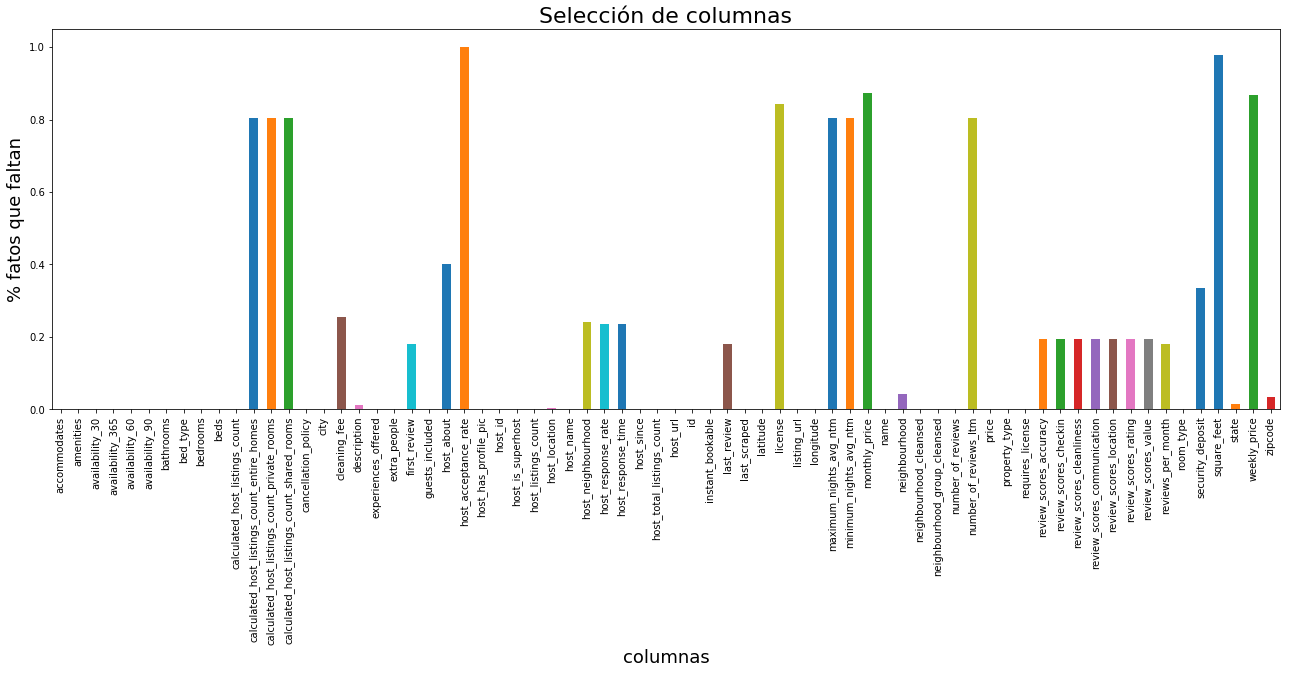

In [8]:
#Representamos gráficamente el % de nulos de las columnas restantes
missing = df.isnull().sum()/df.shape[0]
ax = missing.plot(kind='bar',figsize=(22,7))
ax.set_xlabel('columnas',fontsize=18)
ax.set_ylabel('% fatos que faltan',fontsize=18)
ax.set_title('Selección de columnas',fontsize=22)
plt.show()


In [9]:
nulos = missing.loc[missing > 0.3].index
nulos_lista = list(nulos)
nulos_lista

['calculated_host_listings_count_entire_homes',
 'calculated_host_listings_count_private_rooms',
 'calculated_host_listings_count_shared_rooms',
 'host_about',
 'host_acceptance_rate',
 'license',
 'maximum_nights_avg_ntm',
 'minimum_nights_avg_ntm',
 'monthly_price',
 'number_of_reviews_ltm',
 'security_deposit',
 'square_feet',
 'weekly_price']

In [10]:
#Tenemos 62 columnas para realizar el análisis, pudiendo ser reducidas en el futuro en caso de ser considerado.
df.drop(nulos, axis = 1, inplace = True)
df.shape

(176705, 57)

In [11]:
#Obtenemos el % de nulos para cada periodo en Madrid, la segunda parte de la función se utiliza
#para eliminar aquellos campos que no se usaban en el momento del scrapping.
def saca_nulos(file):
    try:
        df_month = pd.read_csv(file,compression='gzip',low_memory=False)
        global Useless
        df_month.drop(Useless,axis=1,inplace = True)
        missing = df_month.isnull().sum()/df_month.shape[0]
        nulos_month = missing.loc[missing > 0.3].index
        return list(nulos_month)
    except:
        df_month = pd.read_csv(file,compression='gzip',low_memory=False)
        global a_borrar_desconocidas
        a_borrar_desconocidas = ['is_location_exact','is_business_travel_ready',
                         'host_verifications','host_identity_verified']
        Useless = a_borrar_texto+a_borrar_redundantes+a_borrar_urls+a_borrar_desconocidas+a_borrar_scrapping+a_borrar_irrelevantes
        df_month.drop(Useless,axis=1,inplace = True)
        missing = df_month.isnull().sum()/df_month.shape[0]
        nulos_month = missing.loc[missing > 0.3].index
        return list(nulos_month)


In [12]:
filenames = ['Data/Madrid/listings0.csv.gz','Data/Madrid/listings1.csv.gz',
             'Data/Madrid/listings2.csv.gz','Data/Madrid/listings3.csv.gz',
             'Data/Madrid/listings4.csv.gz','Data/Madrid/listings5.csv.gz',
             'Data/Madrid/listings6.csv.gz','Data/Madrid/listings7.csv.gz',
             'Data/Madrid/listings8.csv.gz','Data/Madrid/listings9.csv.gz']
months = ['ene','dic','oct','sep','ago','jul','may','abr','ene']


In [13]:
lista_nulos_por_periodo = []
for f in filenames:
    a = saca_nulos(f)
    lista_nulos_por_periodo.append(a)


In [14]:
#Comprobamos que nos devuelve una lista de listas dividida por meses
lista_nulos_por_periodo

[['host_about',
  'host_response_time',
  'host_response_rate',
  'host_acceptance_rate',
  'square_feet',
  'weekly_price',
  'monthly_price',
  'security_deposit',
  'license'],
 ['host_about',
  'host_response_time',
  'host_response_rate',
  'host_acceptance_rate',
  'square_feet',
  'weekly_price',
  'monthly_price',
  'security_deposit',
  'license'],
 ['host_about',
  'host_acceptance_rate',
  'square_feet',
  'weekly_price',
  'monthly_price',
  'security_deposit',
  'license'],
 ['host_about',
  'host_response_time',
  'host_response_rate',
  'host_acceptance_rate',
  'square_feet',
  'weekly_price',
  'monthly_price',
  'security_deposit',
  'license'],
 ['host_about',
  'host_response_time',
  'host_response_rate',
  'host_acceptance_rate',
  'square_feet',
  'weekly_price',
  'monthly_price',
  'security_deposit',
  'license'],
 ['host_about',
  'host_acceptance_rate',
  'square_feet',
  'weekly_price',
  'monthly_price',
  'security_deposit',
  'license'],
 ['host_about',


In [15]:
#Como lo que nos interesa es borrar aquellas columnas que han sido más de un 30% nulas 
#debemos obtener los valores únicos en la lista
lista_demasiados_nulos = []
for i in range(len(filenames)):
    for x in lista_nulos_por_periodo[i]:
        if x not in lista_demasiados_nulos:
            lista_demasiados_nulos.append(x)

In [16]:
len(filenames)

10

In [17]:
#Estas son las columnas que borraremos de cualquier periodo a analizar(en Madrid) para que los datos sean consistentes
lista_demasiados_nulos

['host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'square_feet',
 'weekly_price',
 'monthly_price',
 'security_deposit',
 'license']

In [18]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
df.head()

,accommodates,amenities,availability_30,availability_365,availability_60,availability_90,bathrooms,bed_type,bedrooms,beds,calculated_host_listings_count,cancellation_policy,city,cleaning_fee,description,experiences_offered,extra_people,first_review,guests_included,host_has_profile_pic,host_id,host_is_superhost,host_listings_count,host_location,host_name,host_neighbourhood,host_response_rate,host_response_time,host_since,host_total_listings_count,host_url,id,instant_bookable,last_review,last_scraped,latitude,listing_url,longitude,name,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,number_of_reviews,price,property_type,requires_license,review_scores_accuracy,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,reviews_per_month,room_type,state,zipcode
0,2,"{Wifi,""Air conditioning"",Kitchen,Elevator,Heat...",30,83,53,83,1.0,Real Bed,1.0,0.0,1,flexible,Madrid,$5.00,BETTER THAN A HOTEL.Upscale neighboorhood (Met...,none,$15.00,2010-03-14,2,t,13660,f,1.0,"Madrid, Madrid, Spain",Simon,Hispanoamérica,100%,within an hour,2009-04-16,1.0,https://www.airbnb.com/users/show/13660,6369,f,2019-01-18,2019-02-06,40.456283,https://www.airbnb.com/rooms/6369,-3.677625,"Rooftop terrace room with ensuite bathroom, Airc.",NaN,Hispanoamérica,Chamartín,60,$70.00,Apartment,t,10.0,9.0,10.0,10.0,9.0,98.0,10.0,0.55,Private room,Comunidad de Madrid,28016
1,1,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,""...",0,0,0,0,1.0,Real Bed,1.0,1.0,2,strict_14_with_grace_period,Madrid,NaN,We have a quiet and sunny room with a good vie...,none,$8.00,2014-10-10,1,t,83531,f,2.0,"Madrid, Madrid, Spain",Abdel,Aluche,NaN,NaN,2010-02-21,2.0,https://www.airbnb.com/users/show/83531,21853,f,2018-07-15,2019-02-06,40.403410,https://www.airbnb.com/rooms/21853,-3.740842,Bright and airy room,Aluche,Cármenes,Latina,33,$17.00,Apartment,t,9.0,10.0,9.0,10.0,8.0,92.0,9.0,0.63,Private room,Madrid,28047
2,4,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",18,317,35,56,1.0,Real Bed,2.0,3.0,1,moderate,Madrid,$0.00,"Select the Madrid more ""cool"" : 70 m, 2 bedroo...",none,$0.00,2011-06-02,4,t,101653,t,1.0,"Las Rozas, Madrid, Spain",Tenty,Justicia,100%,within a few hours,2010-03-31,1.0,https://www.airbnb.com/users/show/101653,24836,f,2019-01-04,2019-02-06,40.419951,https://www.airbnb.com/rooms/24836,-3.697637,"Select the Madrid more ""cool"".",Justicia,Justicia,Centro,52,$115.00,Apartment,t,10.0,10.0,10.0,10.0,10.0,98.0,10.0,0.56,Entire home/apt,Comunidad de Madrid,28004
3,2,"{Internet,Wifi,""Wheelchair accessible"",Doorman...",29,364,59,89,1.0,Real Bed,1.0,1.0,2,flexible,Madrid,$20.00,Room for two person with dressing room and bat...,none,$50.00,2010-09-28,2,t,114340,f,2.0,"Madrid, Madrid, Spain",Agustina,Legazpi,100%,within an hour,2010-04-27,2.0,https://www.airbnb.com/users/show/114340,26823,f,2018-11-25,2019-02-06,40.391161,https://www.airbnb.com/rooms/26823,-3.688234,Roon for two people,Legazpi,Legazpi,Arganzuela,29,$45.00,Hostel,t,10.0,10.0,10.0,9.0,9.0,88.0,9.0,0.28,Private room,Comunidad de Madrid,28045
4,1,"{Wifi,""Wheelchair accessible"",Doorman,Elevator...",2,329,31,61,1.0,Real Bed,1.0,1.0,2,strict_14_with_grace_period,Madrid,$15.00,Nice and cozy roon for one person with a priva...,none,$0.00,2010-05-10,1,t,114340,f,2.0,"Madrid, Madrid, Spain",Agustina,Legazpi,100%,within an hour,2010-04-27,2.0,https://www.airbnb.com/users/show/114340,26825,f,2019-02-01,2019-02-06,40.389850,https://www.airbnb.com/rooms/26825,-3.690108,Single Room whith private Bathroom,Legazpi,Legazpi,Arganzuela,124,$25.00,Hostel,t,10.0,10.0,10.0,9.0,9.0,94.0,10.0,1.16,Private room,Comunidad de Madrid,28045


In [19]:
#Pasamos las fechas de formato texto a fecha
df.last_scraped = pd.to_datetime(df.last_scraped)
df.host_since = pd.to_datetime(df.host_since)
df.first_review = pd.to_datetime(df.first_review)
df.last_review = pd.to_datetime(df.last_review)
df.last_scraped.dtype

dtype('<M8[ns]')

In [20]:
#Reemplazamos valores de la tabla por otros identificables
nulo_escondido = ['experiences_offered','host_has_profile_pic']

In [21]:
df.drop(nulo_escondido, axis=1,inplace=True)

In [22]:
df.shape

(176705, 55)

In [23]:
df.host_location.value_counts()

Madrid, Community of Madrid, Spain                                  115895
ES                                                                   23819
Madrid, Madrid, Spain                                                11704
Barcelona, Catalonia, Spain                                           3056
Spain                                                                 2601
US                                                                     547
London, England, United Kingdom                                        540
Paris, Île-de-France, France                                           511
Las Rozas, Community of Madrid, Spain                                  370
Seville, Andalusia, Spain                                              344
Pozuelo de Alarcón, Comunidad de Madrid, Spain                         323
Bilbao, Basque Country, Spain                                          322
New York, New York, United States                                      307
San Sebastián, Basque Cou

In [24]:
df.loc[df.host_location == 'ES']

,accommodates,amenities,availability_30,availability_365,availability_60,availability_90,bathrooms,bed_type,bedrooms,beds,calculated_host_listings_count,cancellation_policy,city,cleaning_fee,description,extra_people,first_review,guests_included,host_id,host_is_superhost,host_listings_count,host_location,host_name,host_neighbourhood,host_response_rate,host_response_time,host_since,host_total_listings_count,host_url,id,instant_bookable,last_review,last_scraped,latitude,listing_url,longitude,name,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,number_of_reviews,price,property_type,requires_license,review_scores_accuracy,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,reviews_per_month,room_type,state,zipcode
209,6,"{TV,Internet,Wifi,Kitchen,Doorman,Elevator,""In...",0,16,0,0,2.5,Real Bed,3.0,5.0,1,strict_14_with_grace_period,Madrid,NaN,Piso de 130m2 en calle muy tranquila y muy cer...,$0.00,NaT,1,2470700,f,1.0,ES,Jaime,El Tréntaiseis,NaN,NaN,2012-05-26,1.0,https://www.airbnb.com/users/show/2470700,500742,f,NaT,2019-02-06,40.411146,https://www.airbnb.com/rooms/500742,-3.671086,"Near Retiro Park,Madrid 28007 Spain",El Tréntaiseis,Niño Jesús,Retiro,0,$110.00,Apartment,t,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Entire home/apt,Madrid,28007
237,6,{},0,0,0,0,NaN,Real Bed,4.0,NaN,1,flexible,Madrid,$150.00,"Nice condo of 4 bedrooms, private garden, swim...",$0.00,NaT,1,2661721,f,1.0,ES,Tony,Ciudad Lineal,NaN,NaN,2012-06-17,1.0,https://www.airbnb.com/users/show/2661721,541406,f,NaT,2019-02-06,40.469274,https://www.airbnb.com/rooms/541406,-3.664675,Enjoy madrid with all your family,Ciudad Lineal,Costillares,Ciudad Lineal,0,$300.00,House,t,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Entire home/apt,Madrid,28033
325,2,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,""...",0,0,0,0,1.0,Real Bed,2.0,1.0,1,flexible,Madrid,NaN,"Apartment very bright , very spacious . Fully ...",$0.00,2015-08-26,1,3487329,f,1.0,ES,KMitocondria,Carabanchel,NaN,NaN,2012-09-06,1.0,https://www.airbnb.com/users/show/3487329,683969,f,2015-08-26,2019-02-06,40.377541,https://www.airbnb.com/rooms/683969,-3.742761,I share my flat.Two (Website hidden by Airbnb) .,Carabanchel,Puerta Bonita,Carabanchel,1,$20.00,Apartment,t,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.02,Entire home/apt,Madrid,28025
360,8,"{""Cable TV"",Wifi,""Air conditioning"",Kitchen,Do...",29,364,59,89,3.0,Real Bed,4.0,4.0,1,flexible,Madrid,$30.00,Flat quite new (August 2011) Wonderfull views ...,$0.00,NaT,1,3747503,f,1.0,ES,Mariola,Gaztambide,NaN,NaN,2012-10-03,1.0,https://www.airbnb.com/users/show/3747503,724901,f,NaT,2019-02-06,40.438429,https://www.airbnb.com/rooms/724901,-3.716141,Beautiful flat in Madrid Moncloa,Gaztambide,Gaztambide,Chamberí,0,$140.00,Apartment,t,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Entire home/apt,Madrid,28003
436,2,{},29,364,59,89,NaN,Real Bed,1.0,NaN,1,moderate,Madrid,NaN,Familia formada por madre y dos hij@s de 17 y ...,$30.00,NaT,1,4159117,f,1.0,ES,Raquel,San Blas,NaN,NaN,2012-11-15,1.0,https://www.airbnb.com/users/show/4159117,814647,f,NaT,2019-02-06,40.441666,https://www.airbnb.com/rooms/814647,-3.633745,"Alojamiento en familia, Madrid",San Blas,Salvador,San Blas - Canillejas,0,$30.00,House,t,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Private room,Madrid,28027
647,1,"{TV,Wifi,Kitchen,""Free parking on premises"",""S...",29,364,59,89,1.0,Real Bed,1.0,1.0,1,flexible,Madrid,NaN,"Single room for rent with bed of 1,05 metres, ...",$0.00,NaT,1,6427023,f,1.0,ES,Vanesa,Villaverde,NaN,NaN,2013-05-16,1.0,https://www.airbnb.com/users/show/6427023,1174292,f,NaT,2019-02-06,40.354651,https://www.airbnb.com/rooms/1174292,-3.690782,"Room for rent for days, weeks",Villaverde,Los Rosales,Villaverde,0,$78.00,Apartment,t,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Private room,Community of Madrid,28041
677,2,"{TV,Internet,Wifi,Kitchen,""Smoking allowed"",El...",0,172,0,0,1.0,Real Bed,1.0,0.0,2,moderate,Madrid,NaN,"Habitación amueblada y luminosa, con 

In [25]:
#Reemplazamos valores [t,f] por [True, False]

df.host_is_superhost = df.host_is_superhost.str.replace("f","0")
df.host_is_superhost = df.host_is_superhost.str.replace("t","1")




In [26]:
df.requires_license = df.requires_license.str.replace("f","0")
df.requires_license = df.requires_license.str.replace("t","1")

In [27]:
df.instant_bookable = df.instant_bookable.str.replace("f","0")
df.instant_bookable = df.instant_bookable.str.replace("t","1")

In [28]:
df.instant_bookable.head()

0    0
1    0
2    0
3    0
4    0
Name: instant_bookable, dtype: object

In [29]:
df.host_is_superhost = df.host_is_superhost.astype(bool)
df.requires_license = df.requires_license.astype(bool)
df.instant_bookable = df.instant_bookable.astype(bool)

In [30]:
#Comprobamos que está en booleano
df.requires_license.dtype

dtype('bool')

### Las políticas de cancelación del AirBnb son las siguientes:

* Flexible: Si la cancelación se hace con al menos 24h de antelación el huésped tiene derecho a una devolución completa.  Si es con menos de 24h la primera noche no será reembolsada, siendo el resto de los días reembolsados.

* Moderate: La cancelación se debe hacer o bien 48h después de la reserva o 5 días antes de la llegada para obtener reembolso completo.  Si se cancela con menos de 5 días de antelación se reembolsará el *50%* de las noches sin contar la primera.

* Strict_14_with_grace_period: La cancelación se debe hacer o bien 48h después de la reserva o *14* días antes de la llegada para obtener reembolso completo.  Para obtener el 50% del reembolso se debe cancelar con al menos 7 dias completos antes del día y hora local.  Con menos de 7 dias no hay reembolso.

* Super_strict_30: Si la cancelación se produce con al menos 30 días se reembolsa el 50%.

* Super_strict_60: Si la cancelación se produce con al menos 60 días se reembolsa el 50%.

* Long_term: Se aplica a huéspedes que están 28 días o más. El primer mes lo cobra el host sea cual sea la cancelación.

In [31]:
df.cancellation_policy.value_counts()

strict_14_with_grace_period    59166
moderate                       56135
flexible                       53939
strict                          5920
super_strict_30                 1362
super_strict_60                  182
flexible_new                       1
Name: cancellation_policy, dtype: int64

In [32]:
#Pasamos a categórica con cinco niveles
df.cancellation_policy = pd.Categorical(df.cancellation_policy, ['flexible','moderate'
                                                                         ,'strict_14_with_grace_period',
                                                                        'super_strict_30',
                                                                         'super_strict_60'],ordered=True)
df.cancellation_policy.head()

0                       flexible
1    strict_14_with_grace_period
2                       moderate
3                       flexible
4    strict_14_with_grace_period
Name: cancellation_policy, dtype: category
Categories (5, object): [flexible < moderate < strict_14_with_grace_period < super_strict_30 < super_strict_60]

In [33]:
df.head()

,accommodates,amenities,availability_30,availability_365,availability_60,availability_90,bathrooms,bed_type,bedrooms,beds,calculated_host_listings_count,cancellation_policy,city,cleaning_fee,description,extra_people,first_review,guests_included,host_id,host_is_superhost,host_listings_count,host_location,host_name,host_neighbourhood,host_response_rate,host_response_time,host_since,host_total_listings_count,host_url,id,instant_bookable,last_review,last_scraped,latitude,listing_url,longitude,name,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,number_of_reviews,price,property_type,requires_license,review_scores_accuracy,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,reviews_per_month,room_type,state,zipcode
0,2,"{Wifi,""Air conditioning"",Kitchen,Elevator,Heat...",30,83,53,83,1.0,Real Bed,1.0,0.0,1,flexible,Madrid,$5.00,BETTER THAN A HOTEL.Upscale neighboorhood (Met...,$15.00,2010-03-14,2,13660,True,1.0,"Madrid, Madrid, Spain",Simon,Hispanoamérica,100%,within an hour,2009-04-16,1.0,https://www.airbnb.com/users/show/13660,6369,True,2019-01-18,2019-02-06,40.456283,https://www.airbnb.com/rooms/6369,-3.677625,"Rooftop terrace room with ensuite bathroom, Airc.",NaN,Hispanoamérica,Chamartín,60,$70.00,Apartment,True,10.0,9.0,10.0,10.0,9.0,98.0,10.0,0.55,Private room,Comunidad de Madrid,28016
1,1,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,""...",0,0,0,0,1.0,Real Bed,1.0,1.0,2,strict_14_with_grace_period,Madrid,NaN,We have a quiet and sunny room with a good vie...,$8.00,2014-10-10,1,83531,True,2.0,"Madrid, Madrid, Spain",Abdel,Aluche,NaN,NaN,2010-02-21,2.0,https://www.airbnb.com/users/show/83531,21853,True,2018-07-15,2019-02-06,40.403410,https://www.airbnb.com/rooms/21853,-3.740842,Bright and airy room,Aluche,Cármenes,Latina,33,$17.00,Apartment,True,9.0,10.0,9.0,10.0,8.0,92.0,9.0,0.63,Private room,Madrid,28047
2,4,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",18,317,35,56,1.0,Real Bed,2.0,3.0,1,moderate,Madrid,$0.00,"Select the Madrid more ""cool"" : 70 m, 2 bedroo...",$0.00,2011-06-02,4,101653,True,1.0,"Las Rozas, Madrid, Spain",Tenty,Justicia,100%,within a few hours,2010-03-31,1.0,https://www.airbnb.com/users/show/101653,24836,True,2019-01-04,2019-02-06,40.419951,https://www.airbnb.com/rooms/24836,-3.697637,"Select the Madrid more ""cool"".",Justicia,Justicia,Centro,52,$115.00,Apartment,True,10.0,10.0,10.0,10.0,10.0,98.0,10.0,0.56,Entire home/apt,Comunidad de Madrid,28004
3,2,"{Internet,Wifi,""Wheelchair accessible"",Doorman...",29,364,59,89,1.0,Real Bed,1.0,1.0,2,flexible,Madrid,$20.00,Room for two person with dressing room and bat...,$50.00,2010-09-28,2,114340,True,2.0,"Madrid, Madrid, Spain",Agustina,Legazpi,100%,within an hour,2010-04-27,2.0,https://www.airbnb.com/users/show/114340,26823,True,2018-11-25,2019-02-06,40.391161,https://www.airbnb.com/rooms/26823,-3.688234,Roon for two people,Legazpi,Legazpi,Arganzuela,29,$45.00,Hostel,True,10.0,10.0,10.0,9.0,9.0,88.0,9.0,0.28,Private room,Comunidad de Madrid,28045
4,1,"{Wifi,""Wheelchair accessible"",Doorman,Elevator...",2,329,31,61,1.0,Real Bed,1.0,1.0,2,strict_14_with_grace_period,Madrid,$15.00,Nice and cozy roon for one person with a priva...,$0.00,2010-05-10,1,114340,True,2.0,"Madrid, Madrid, Spain",Agustina,Legazpi,100%,within an hour,2010-04-27,2.0,https://www.airbnb.com/users/show/114340,26825,True,2019-02-01,2019-02-06,40.389850,https://www.airbnb.com/rooms/26825,-3.690108,Single Room whith private Bathroom,Legazpi,Legazpi,Arganzuela,124,$25.00,Hostel,True,10.0,10.0,10.0,9.0,9.0,94.0,10.0,1.16,Private room,Comunidad de Madrid,28045


In [34]:
df.shape

(176705, 55)

In [35]:
#Buscamos si el valor centro de City se corresponde con Madrid para admitirlo como válido
df.loc[df.city == "Centro"]

,accommodates,amenities,availability_30,availability_365,availability_60,availability_90,bathrooms,bed_type,bedrooms,beds,calculated_host_listings_count,cancellation_policy,city,cleaning_fee,description,extra_people,first_review,guests_included,host_id,host_is_superhost,host_listings_count,host_location,host_name,host_neighbourhood,host_response_rate,host_response_time,host_since,host_total_listings_count,host_url,id,instant_bookable,last_review,last_scraped,latitude,listing_url,longitude,name,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,number_of_reviews,price,property_type,requires_license,review_scores_accuracy,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,reviews_per_month,room_type,state,zipcode
1115,2,"{TV,Wifi,""Air conditioning"",Kitchen,Elevator,H...",23,358,53,83,1.0,Futon,2.0,2.0,2,moderate,Centro,$30.00,One bedroom + Private Bathroom. Full Comfort. ...,$30.00,2014-04-29,1,132052,True,2.0,"Madrid, Madrid, Spain",Mónica,Cortes,100%,within a few hours,2010-05-25,2.0,https://www.airbnb.com/users/show/132052,2847041,True,2018-12-09,2019-02-06,40.411334,https://www.airbnb.com/rooms/2847041,-3.694809,El Limonero de Las Letras ♡ ♥ ♡,Cortes,Cortes,Centro,37,$70.00,Apartment,True,9.0,9.0,10.0,9.0,10.0,93.0,9.0,0.64,Private room,Madrid,28014
15034,1,"{TV,Internet,Wifi,""Air conditioning"",Elevator,...",17,343,44,74,1.0,Real Bed,1.0,NaN,28,flexible,Centro,NaN,Nuestras habitaciones de lujo en Gran vía con ...,$30.00,NaT,1,215986813,True,28.0,"Madrid, Community of Madrid, Spain",Vitium Urban Suites,NaN,50%,within a day,2018-09-18,28.0,https://www.airbnb.com/users/show/215986813,29329361,True,NaT,2019-02-06,40.422076,https://www.airbnb.com/rooms/29329361,-3.710507,Habitación Superior Doble Uso Individual,Palacio,Palacio,Centro,0,$75.00,Hostel,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Private room,Madrid,28013
15035,2,"{TV,Internet,Wifi,Breakfast,Elevator,Heating,S...",21,344,47,74,1.0,Real Bed,1.0,NaN,28,flexible,Centro,NaN,Nuestras habitaciones de lujo en Gran vía con ...,$30.00,NaT,2,215986813,True,28.0,"Madrid, Community of Madrid, Spain",Vitium Urban Suites,NaN,50%,within a day,2018-09-18,28.0,https://www.airbnb.com/users/show/215986813,29329365,True,NaT,2019-02-06,40.421756,https://www.airbnb.com/rooms/29329365,-3.710421,Habitación Doble 1 o 2 camas con Desayuno,Palacio,Palacio,Centro,0,$75.00,Hostel,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Private room,Madrid,28013
15036,1,"{TV,Internet,""Air conditioning"",Elevator,Heati...",18,337,45,72,1.0,Real Bed,1.0,NaN,28,super_strict_30,Centro,NaN,Nuestras habitaciones de lujo en Gran vía con ...,$30.00,NaT,1,215986813,True,28.0,"Madrid, Community of Madrid, Spain",Vitium Urban Suites,NaN,50%,within a day,2018-09-18,28.0,https://www.airbnb.com/users/show/215986813,29329371,True,NaT,2019-02-06,40.421257,https://www.airbnb.com/rooms/29329371,-3.708997,Habitación Doble de Uso Individual No Reembols...,Palacio,Palacio,Centro,0,$75.00,Hostel,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Private room,Madrid,28013
15037,2,"{TV,Internet,Wifi,Breakfast,Elevator,Heating,S...",21,344,47,74,1.0,Real Bed,1.0,NaN,28,super_strict_30,Centro,NaN,Nuestras habitaciones de lujo en Gran vía con ...,$30.00,NaT,2,215986813,True,28.0,"Madrid, Community of Madrid, Spain",Vitium Urban Suites,NaN,50%,within a day,2018-09-18,28.0,https://www.airbnb.com/users/show/215986813,29329411,True,NaT,2019-02-06,40.423284,https://www.airbnb.com/rooms/29329411,-3.710784,Habitación Doble 1 o 2 camas con Desayuno No R...,Palacio,Palacio,Centro,0,$75.00,Hostel,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Private room,Madrid,28013
15038,1,"{TV,Internet,""Air conditioning"",Elevator,Heati...",18,337,45,72,1.0,Real Bed,1.0,NaN,28,moderate,Centro,NaN,Nuestras habitaciones de lujo en Gran vía con ...,$30.00,NaT,1,215986813,True,28.0,"Madrid, Community of Madrid, Spain",Vitium Urban Suites,NaN,50%,within a day,2018-09-18,28.0,https://www.airbn

In [36]:
#Seleccionamos aquellos valores para los que validaremos que pertenecen a Madrid
df.city.value_counts()
df = df[df.city.isin(["Madrid","MADRID","Centro","Madrid Center",
"Madrid, Comunidad de Madrid, ES","madrid"," Madrid"])]

In [37]:
cities = list(df.city.value_counts().index)

for x in cities:
    df.city = df.city.str.replace(x,"Madrid")

In [38]:
#Comprobamos que los valores se han sustituido correctamente
df.city.value_counts()

Madrid    176226
Name: city, dtype: int64

In [39]:
df.state.value_counts()

Comunidad de Madrid                149260
Community of Madrid                 13989
Madrid                               8867
Spain                                1292
city                                   60
madrid                                 44
MADRID                                 29
España                                 24
28                                     20
Communauté de Madrid                   18
Autonome Gemeinschaft Madrid           18
Comunidad de Madrid , Atocha           14
Madrid, Spain                           5
Madrid España                           5
CM                                      4
Madrid,puerta del sol                   2
Madrid centro plaza mayor               2
Comunity of Madrid                      1
spain                                   1
Madrid centro plaza mayor, sol.         1
Name: state, dtype: int64

In [40]:
#Comprobamos que la columna neighbourhood contiene la información más precisa
df.neighbourhood.value_counts()

Malasaña               15837
La Latina              13618
Embajadores            13550
Sol                    11176
Justicia                9342
Cortes                  7606
Palacio                 6971
Carabanchel             4756
Ciudad Lineal           4519
Aluche                  4368
Puente de Vallecas      3511
Centro                  3375
Chamberí                3281
Argüelles               3251
Salamanca               2864
Palos do Moguer         2783
Moncloa                 2748
Goya                    2495
Trafalgar               2467
Usera                   2183
Recoletos               2180
Fuencarral-el Pardo     2173
Hortaleza               2165
San Blas                1912
Retiro                  1866
Guindalera              1629
Pacifico                1610
Delicias                1572
Gaztambide              1541
Cuatro Caminos          1514
Acacias                 1493
Almagro                 1391
Arapiles                1321
Ibiza                   1314
Castellana    

In [41]:
df.neighbourhood_group_cleansed.value_counts(dropna = False)

Centro                   91358
Salamanca                11739
Chamberí                 10266
Arganzuela                9874
Tetuán                    6551
Retiro                    5740
Carabanchel               5293
Moncloa - Aravaca         4976
Latina                    4885
Chamartín                 4684
Ciudad Lineal             4531
Puente de Vallecas        3695
Usera                     2327
Hortaleza                 2260
Fuencarral - El Pardo     2094
San Blas - Canillejas     1932
Villaverde                1141
Barajas                   1125
Moratalaz                  864
Villa de Vallecas          553
Vicálvaro                  338
Name: neighbourhood_group_cleansed, dtype: int64

In [42]:
#Comprobamos que la columna neighborhood viene más específica pero 
#tiene el inconveniente de tener muchos nulos. Por tanto mantenemos las otras dos referentes a barrio y distrito.
#Quitamos la columna host_name ya que no consideramos relevante el nombre del host
df.drop(["host_name","host_location","zipcode","state","neighbourhood"], axis=1, inplace=True)

In [43]:
df.shape

(176226, 50)